# Going Deeper 3. 잘만든 Augmentation 이미지 100장 안  부럽다.


************************
> ! mkdir -p ~/aiffel/data_augmentation/images



*****************************
## 3-2 데이터셋의 현실

- 데이터들은 충분히 모으기도 쉽지 않지만, 고품질로 정제하는 과정도 만만치 않다.

## 3-3 Data Augmentation이란?

- Mirroring

- Shearing

- Random Cropping

- RGB 색 변형을 할 때 => PCA 주성분 검사를 통해 RGB를 조절한다. 전체적인 색조를 유지하면서, 조절하는것. 만약 파랑, 빨강이 주된 색이라면 초록을 적게 변화 주고, 파랑과 빨강에 빼거나 더하거나 큰 변화를 주는 방법.


- 참조 : https://www.youtube.com/watch?v=JI8saFjK84o   

### 데이터가 많아진다는 것은 과적합(overfitting)을 줄일 수 있다는 것을 의미.

- 테스트 이미지는 다양한 노이즈가 있는 경우 테스트에서 좋은 성능을 내기 위해서는 이러한 노이즈의 분포를 예측하고 학습 데이터에 노이즈를 삽입해 모델이 이런 노이즈에 잘 대응할 수 있도록 해야 한다.

### 이미지 데이터 augmentation

- 포토샵, SNS의 사진 필터, 각종 카메라 앱의 기능들과 비슷

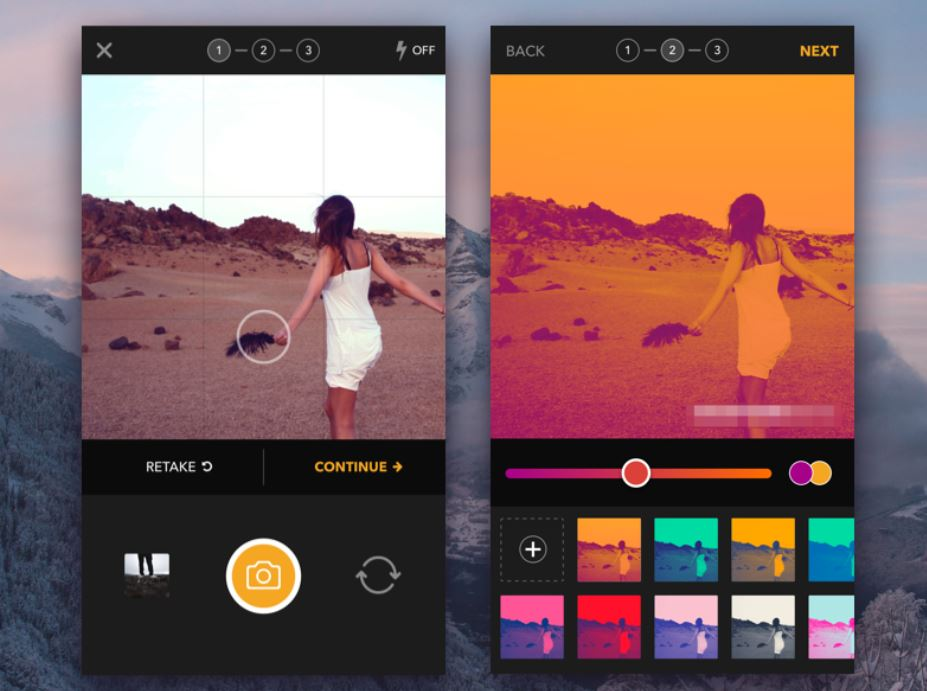

**********************
## 3-4. Data Augmentation이란?(2) 다양한 Image Augmentation 방법


- tf.image를 사용한 데이터 증강 방법 : https://www.tensorflow.org/tutorials/images/data_augmentation


### Flipping

- Flip은 이미지를 대칭하는 기능. (분류 문제에서는 문제가 없을 수 있다. 하지만 물체 탐지(detection), 세그멘테이션(segmentation)문제 등 정확한 정답 영역이 존재하는 문제에 적용시에는 라벨로 같이 좌우 반전을 해주어야 함.)

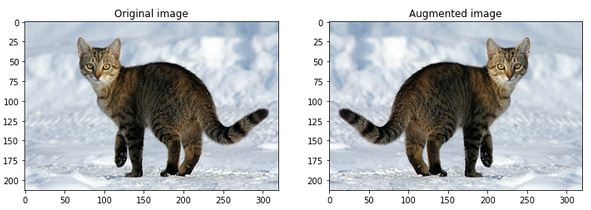

### Gray scale

- 3가지 채널(channel)을 가진 RGB 이미지를 하나의 채널을 가지도록 해준다. RGB 각각의 채널마다 가중치(weight)를 주어 가중합(weighted sum)을 하였습니다.

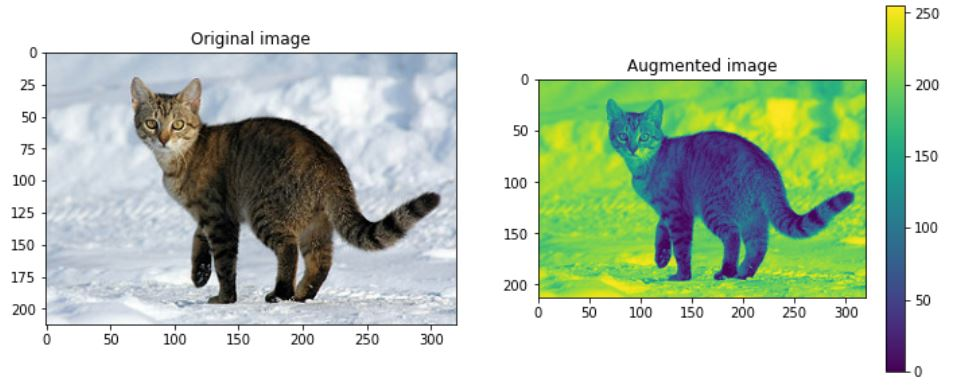

### Saturation

- RGB 이미지를 HSW(H(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현) 이미지로 변경하고 S(saturation) 채널에 오프셋(offset)을 적용. 조금 더 이미지를 선명하게 만들어 줍니다. 이후 다시 우리가 사용하는 RGB 색상 모델로 변경.

참고 : https://darkpgmr.tistory.com/66

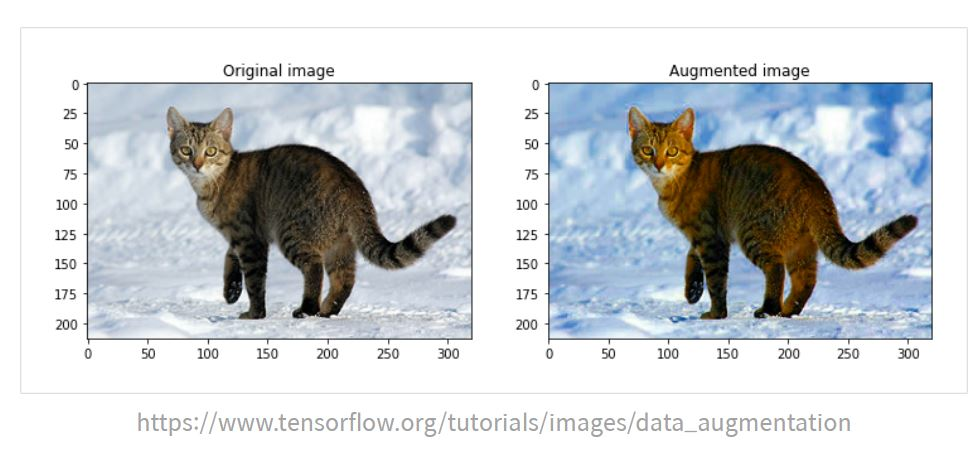

### Brightness

- 밝기 조절. (255,255,255)는 흰색. (0,0,0)은 검은색

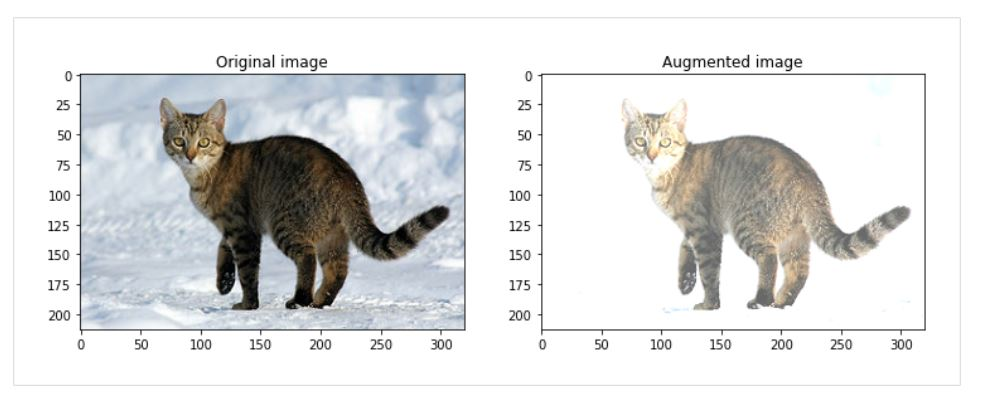

### Rotation

- 이미지 각도 변환 (90도 단위로 돌리지 않는 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의)

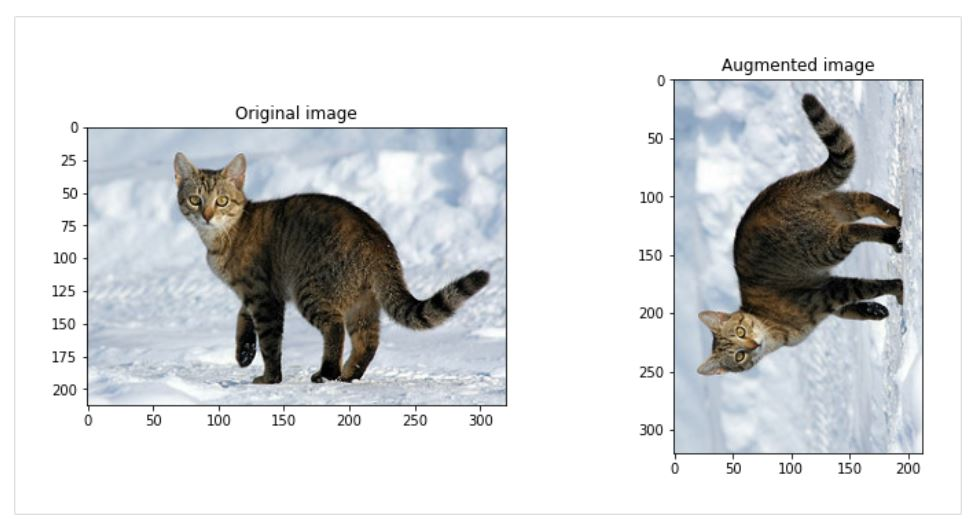

### Center Crop

- 이미지 중앙을 기준으로 확대. 너무 작게 center crop을 할 경우 본래 가진 라벨과 맞지 않게 되는 상황 발생

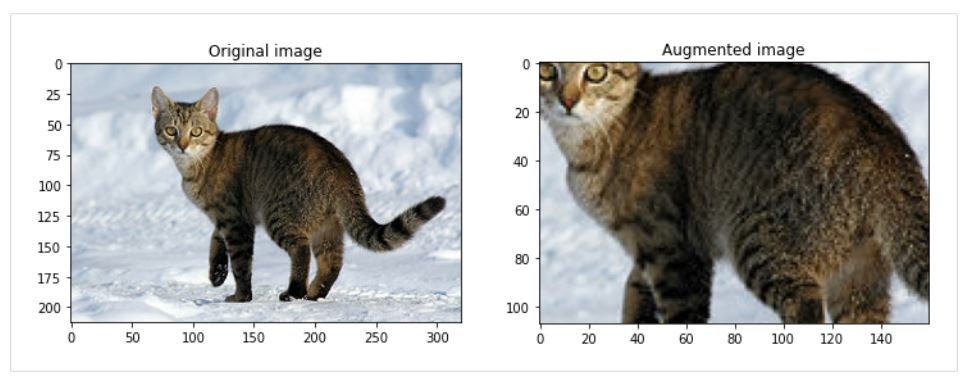

   - Gaussian noise
   - Contrast change
   - Sharpen
   - Affine transformation
   - Padding
   - Blurring

## 3-5. 텐서플로우를 사용한 Image Augmentation (1) Flip

> ! ln -s ~/data/* ~/aiffel/data_augmentation/images/

In [6]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

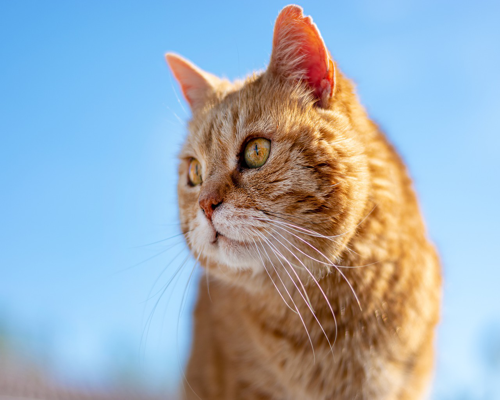

In [7]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip 해보기

- flip_left_right와 flip_up_down 두 가지로 좌우와 상하 반전으로 구분.

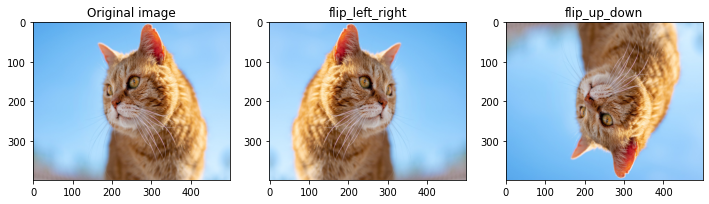

In [10]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

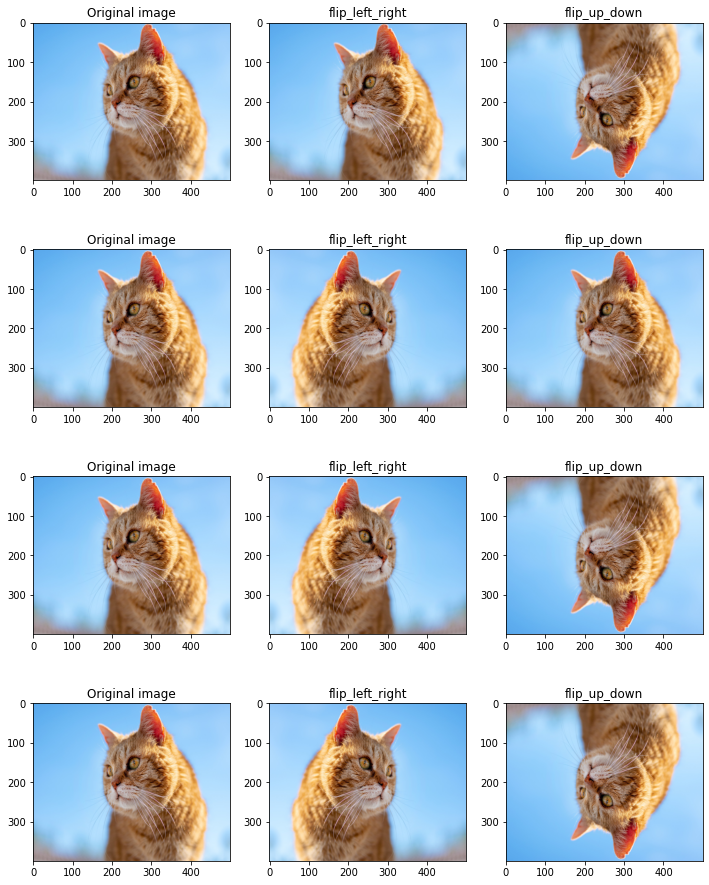

In [11]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## 3-6. 텐서플로우를 사용한 Image Augmentation(2) Center Crop

- central_fraction은 얼마나 확대를 할지르 조절하는 매개변수.

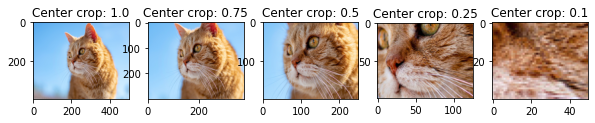

In [12]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

-  tf.random.uniform을 사용해서 central_fraction 매개변수에 전달할 값을 만들고 이를 사용해 cropped_tensor를 만들어내는 random_central_crop() 함수.

In [13]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

=3


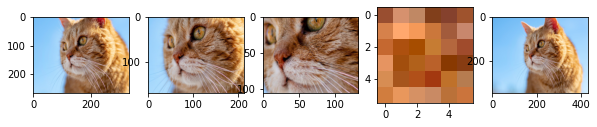

In [14]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

### 텐서플로우의 tf.random 모듈의 tf.random.uniform()과 tf.random.normal()의 차이는??

- 랜덤값을 uniform distribution으로 뽑는 것과 normal distribution으로 뽑는 차이 입니다. normal distribution의 경우 mean, std를 통해서 분포를 조절할 수 있습니다.

## 3-7. 텐서플로우를 사용한 Image Augmentation(3) 직접 해보기


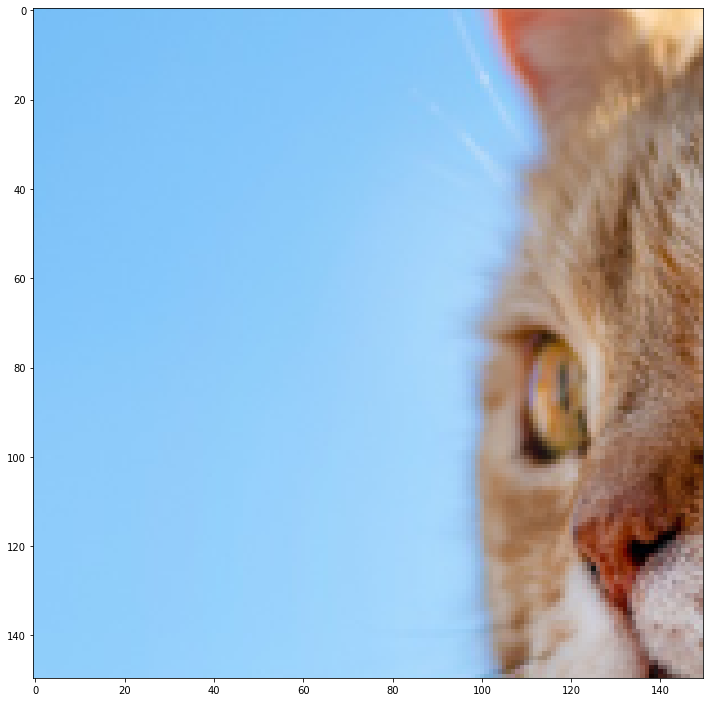

In [16]:
# apply random_crop on cat image
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[150,150,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

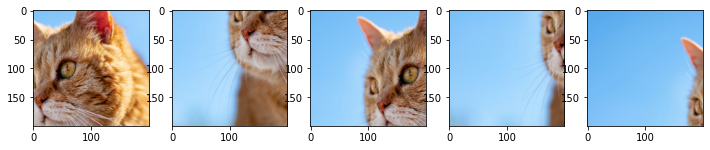

In [18]:
# display 5 random cropped images
# 여기에 코드를 입력해 주세요.
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

- tf.image.random_brightness()

    - tf.image.random_brightness() 다음에는 tf.clip_by_value()를 적용해 주는 것을 잊지 마세요. 

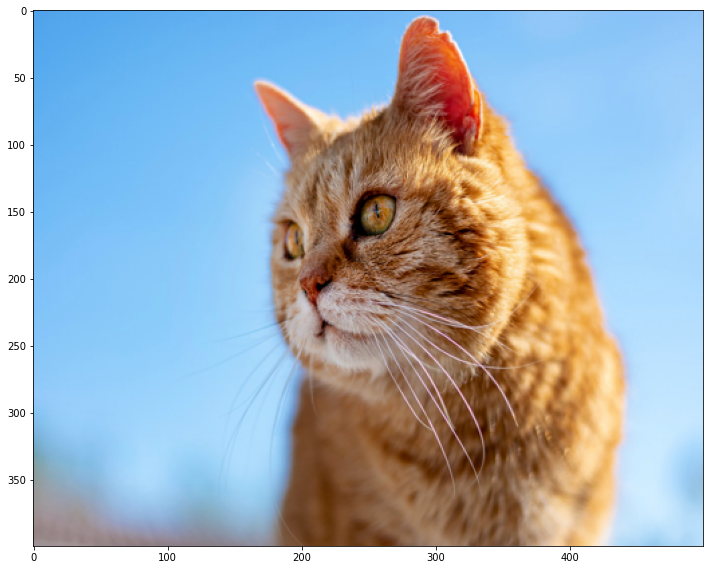

In [19]:
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

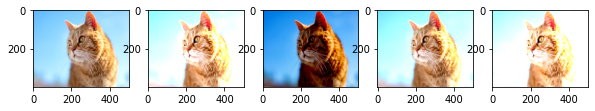

In [20]:
# display 5 random brightness images
# 여기에 코드를 입력해 주세요.
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

## 3-8. imgaug 라이브러리

- 참고 : https://github.com/aleju/imgaug

- 이미지에 augmentation을 적용할 때는 정답(ground truth 또는 gt)이 되는 데이터에도 augmentation이 동일하게 적용이 되어야 함.

- Image 컬럼은 각 원본 이미지들이고 Heatmaps, Seg. Maps(Segmentation Maps), Keypoints, Bouding Boxes, Polygons 컬럼은 해당 원본 데이터에 대해 각 이미지 태스크에 따른 정답 데이터이다.

- imgaug에서는 배열을 이미지의 기본 형태로 사용. (PIL Image 데이터형을 넘파이 배열로 변환해서 사용.)

In [21]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

- iaa.Affine()
    - 이미지 스케일을 조절하거나, 평행이동, 회전 등의 변환

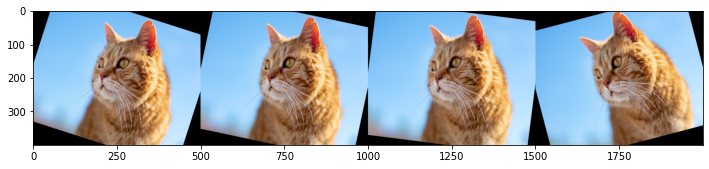

In [22]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

- iaa.Crop()
    - 원본 이미지의 비율을 매개변수로 사용

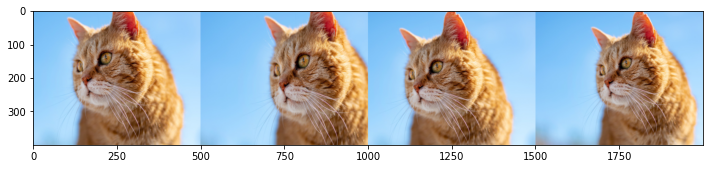

In [23]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

- iaa.Sequential()

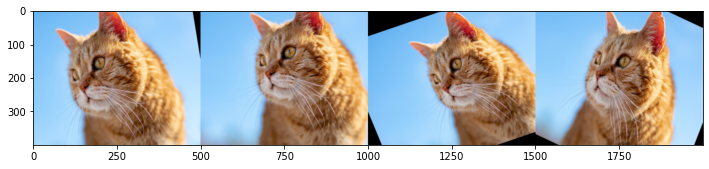

In [24]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

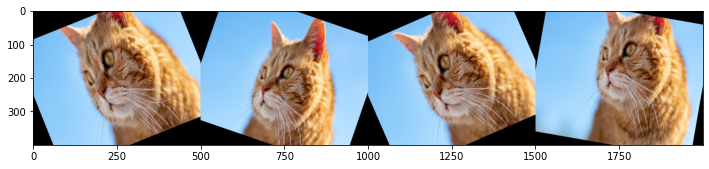

In [25]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

- iaa.OneOf()를 사용하면 여러 augmentation 기법들 중 하나를 선택

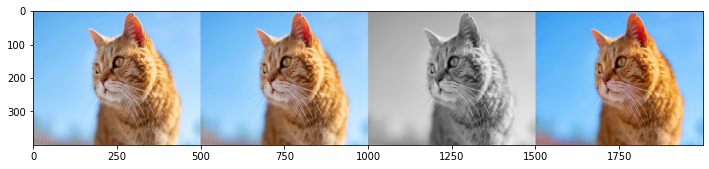

In [26]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

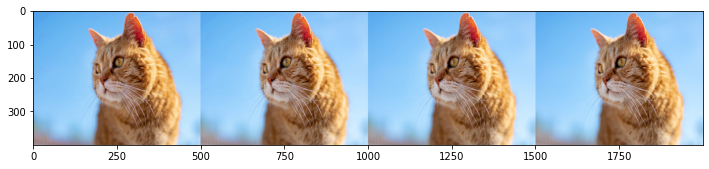

In [27]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

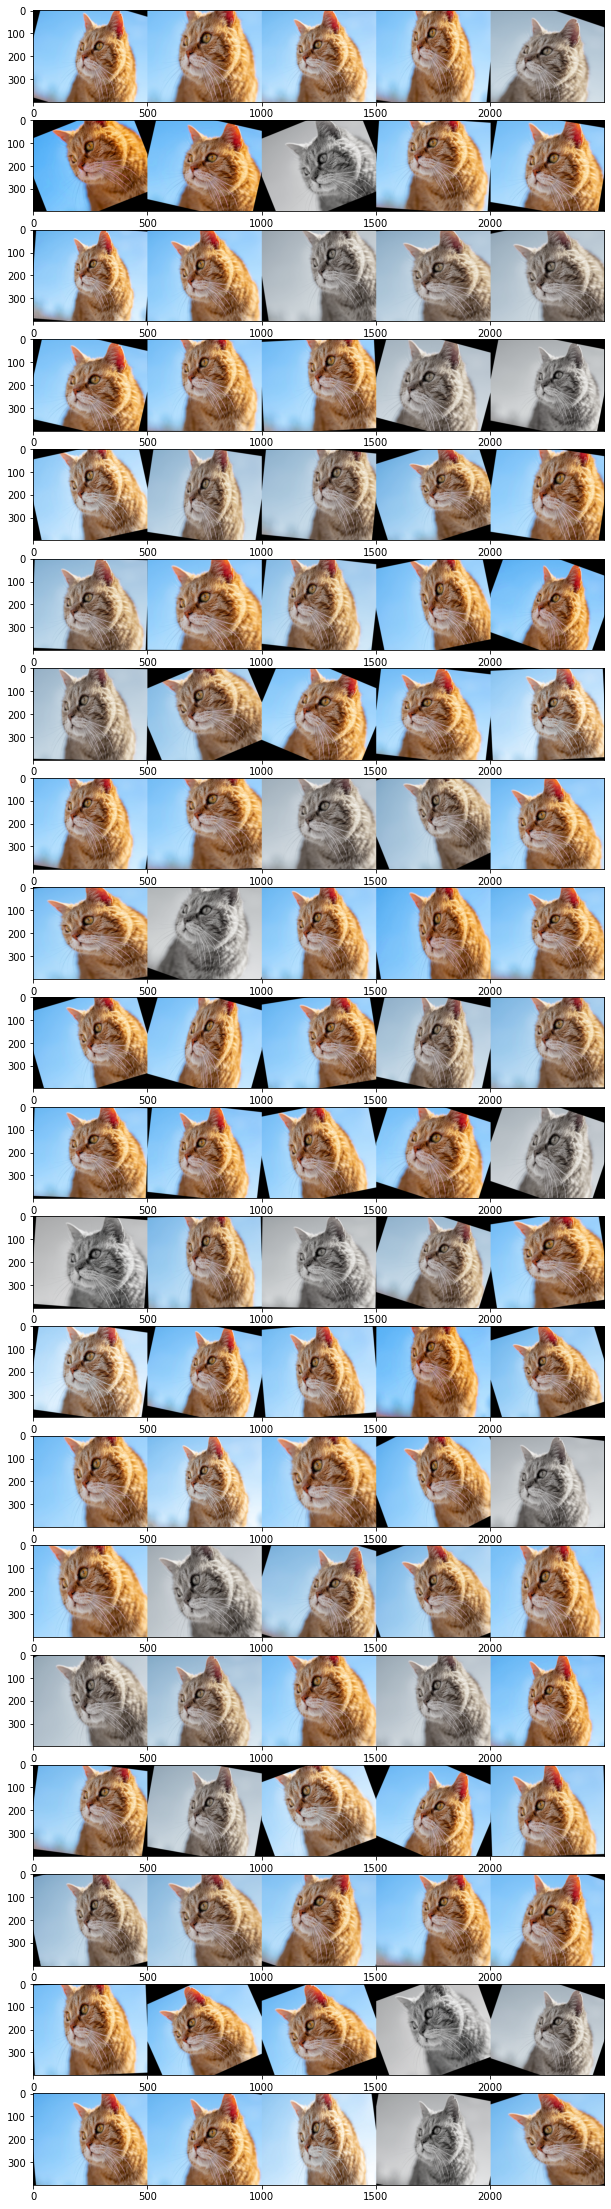

In [28]:
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(12, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()

## 3-9. 더 나아간 기법들

- augmentation 방법과 GAN을 활용 : http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf